<a href="https://colab.research.google.com/github/febriantimayori/PCVK_Ganjil_2024/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**
> Nama: Febrianti Mayori

> NIM: 2241720248

> Kelas: TI-3D

## **TUGAS PRAKTIKUM**
**1. Buat Gamma Correction sesuai dengan petunjuk berikut**
> Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


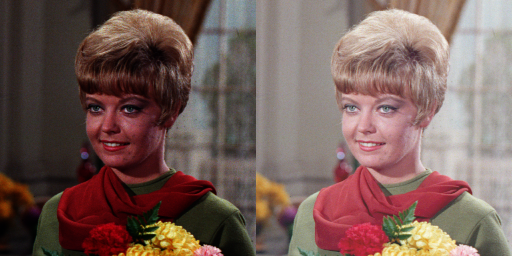

In [5]:
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Fungsi untuk melakukan Gamma Correction
def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

# Menampilkan informasi dan meminta input dari pengguna
print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Menerapkan Gamma Correction
gamma_img = gamma_correction(original_img, gamma)

# Menampilkan hasil gambar
cv2_imshow(cv2.hconcat([original_img, gamma_img]))

**2. Buat Simulasi Image Depth**
> Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111) Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

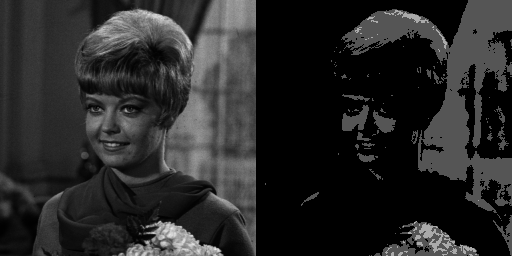

In [6]:
# Kedalaman bit yang diinginkan
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Mengubah gambar menjadi grayscale
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Membuat citra dengan kedalaman bit
depth_image = np.zeros(gray_image.shape, gray_image.dtype)
depth_image = (np.floor(gray_image / level) * level).astype('uint8')

# Menampilkan gambar asli grayscale dan gambar hasil simulasi depth
cv2_imshow(cv2.hconcat([gray_image, depth_image]))

**3. Buat modul Average Denoising**
> Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).


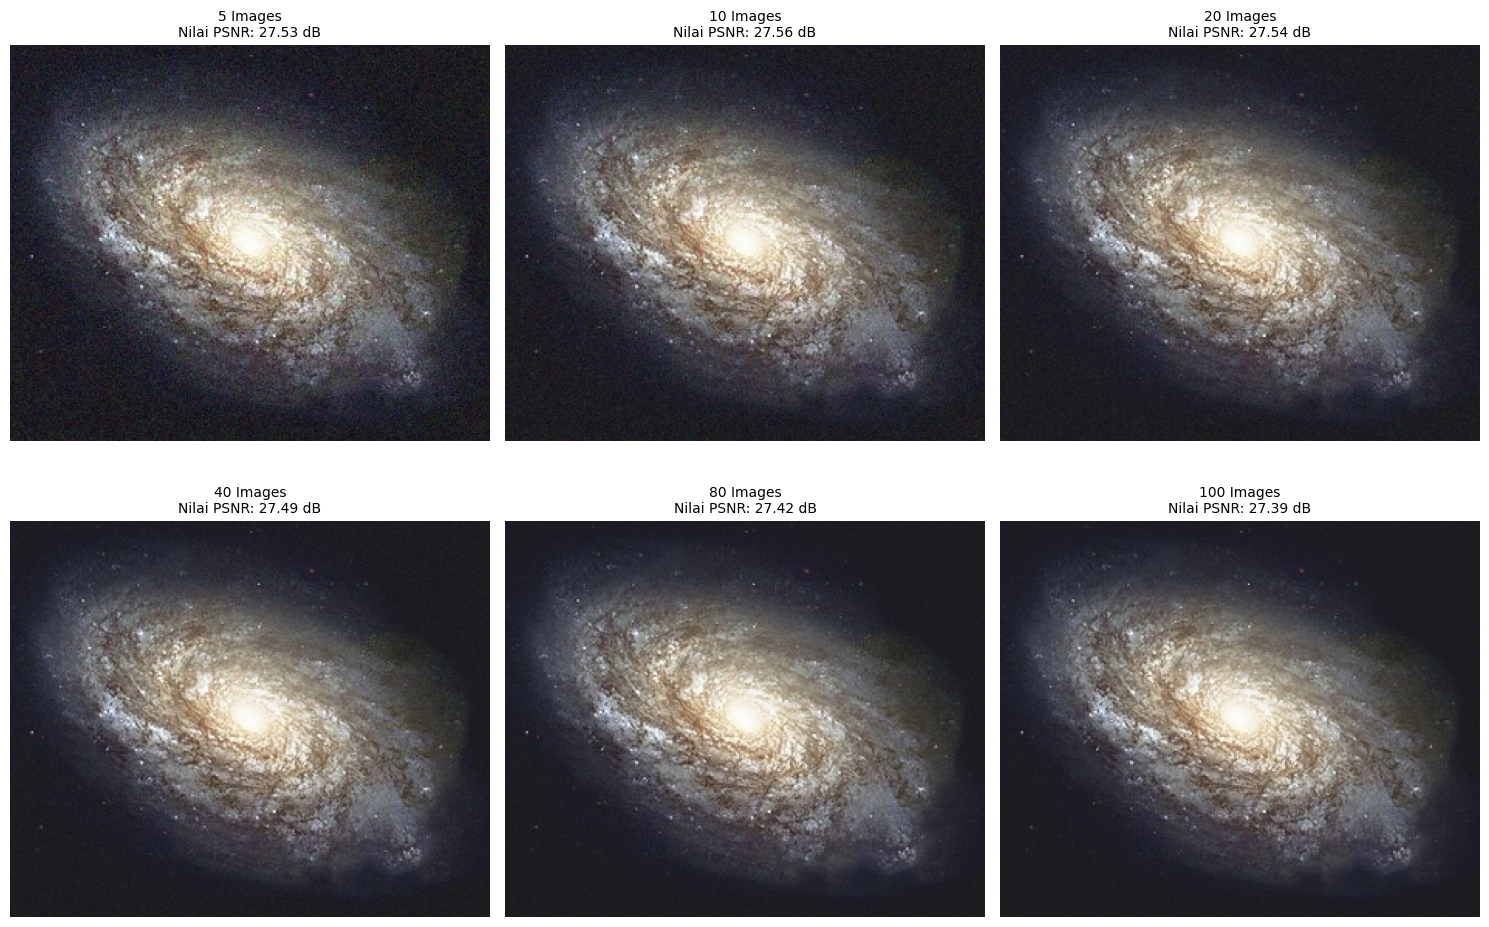

In [7]:
import glob
from math import log10, sqrt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Memuat gambar asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Memuat semua gambar berisik dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

if len(cv_img) == 0:
    raise ValueError("Tidak ada gambar noise ditemukan di folder!")

# Parameter jumlah gambar yang digunakan untuk denoising
test_images_counts = [5, 10, 20, 40, 80, 100]

# Membuat subplot untuk menampilkan hasil
rows = 2
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    # Cek apakah jumlah gambar cukup
    if num_images > len(cv_img):
        print(f"Jumlah gambar {num_images} lebih dari gambar yang tersedia ({len(cv_img)}). Menggunakan gambar maksimal.")
        num_images = len(cv_img)

    # Inisialisasi gambar rata-rata
    average_img = np.zeros(cv_img[0].shape, np.float32)

    # Proses rata-rata dari gambar yang tersedia
    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    # Menghitung PSNR antara gambar asli dan gambar hasil denoising
    psnr_value = PSNR(original_img, denoised_img)

    # Menampilkan hasil
    row = index // cols
    col = index % cols
    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nNilai PSNR: {psnr_value:.2f} dB', fontsize=10)
    axs[row, col].axis('off')

# Menonaktifkan sumbu kosong jika ada
for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah...
> **Jawab:** Semakin banyak gambar yang digunakan untuk menghilangkan noise, semakin bagus kualitas gambar dan semakin tinggi nilai PSNR.

**4. Buat image masking untuk image berikut.**
> Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

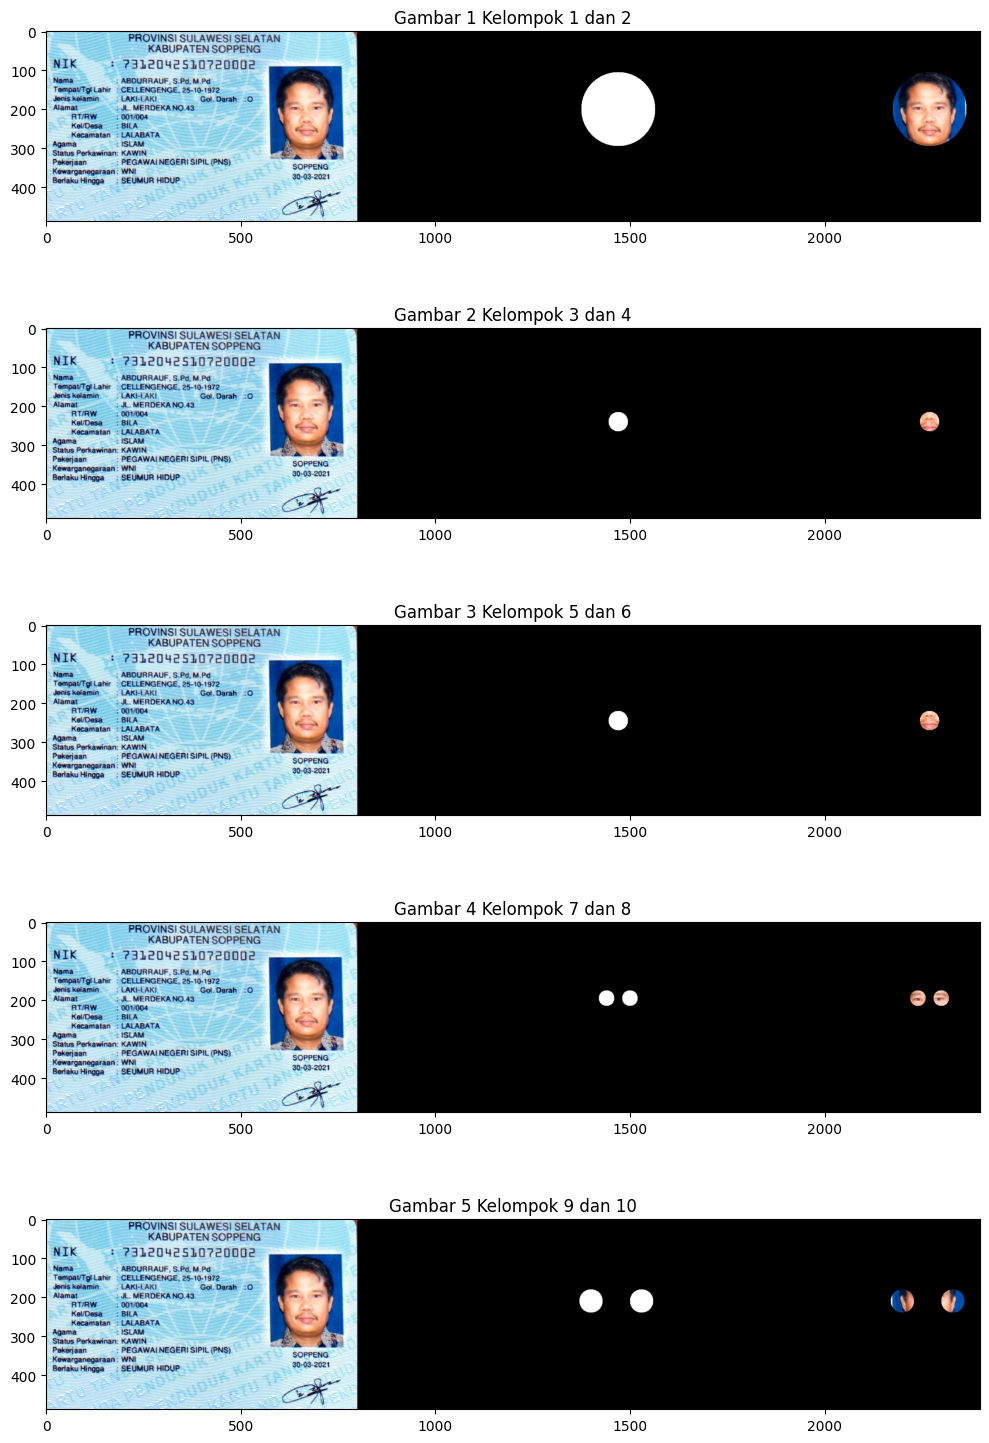

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Jika menggunakan Google Colab
import matplotlib.pyplot as plt

# Membaca gambar asli (gambar KTP yang diunggah)
img_ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp2.jpg')  # Path gambar sesuai file yang diunggah

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
mask1 = np.zeros(img_ktp.shape, dtype=np.uint8)
mask2 = np.zeros(img_ktp.shape, dtype=np.uint8)
mask3 = np.zeros(img_ktp.shape, dtype=np.uint8)
mask4 = np.zeros(img_ktp.shape, dtype=np.uint8)
mask5 = np.zeros(img_ktp.shape, dtype=np.uint8)

# Membuat beberapa lingkaran sebagai mask pada posisi yang berbeda
mask1 = cv2.circle(mask1, (670, 200), 95, (255, 255, 255), -1)
mask2 = cv2.circle(mask2, (670, 240), 25, (255, 255, 255), -1)
mask3 = cv2.circle(mask3, (670, 245), 25, (255, 255, 255), -1)
mask4 = cv2.circle(mask4, (700, 195), 20, (255, 255, 255), -1) # lingkar 1 M
mask4 = cv2.circle(mask4, (640, 195), 20, (255, 255, 255), -1) # lingkar 2 M
mask5 = cv2.circle(mask5, (600, 210), 30, (255, 255, 255), -1) # lingkar 1 T
mask5 = cv2.circle(mask5, (730, 210), 30, (255, 255, 255), -1) # lingkar 2 T

# Menggabungkan gambar asli dengan mask menggunakan operasi bitwise AND
result_and1 = cv2.bitwise_and(img_ktp, mask1)
result_and2 = cv2.bitwise_and(img_ktp, mask2)
result_and3 = cv2.bitwise_and(img_ktp, mask3)
result_and4 = cv2.bitwise_and(img_ktp, mask4)
result_and5 = cv2.bitwise_and(img_ktp, mask5)

# Menggabungkan semua gambar (asli, mask, dan hasil)
final_frame_masking1 = cv2.hconcat([img_ktp, mask1, result_and1])
final_frame_masking2 = cv2.hconcat([img_ktp, mask2, result_and2])
final_frame_masking3 = cv2.hconcat([img_ktp, mask3, result_and3])
final_frame_masking4 = cv2.hconcat([img_ktp, mask4, result_and4])
final_frame_masking5 = cv2.hconcat([img_ktp, mask5, result_and5])

# Menampilkan hasil dengan title secara vertikal
plt.figure(figsize=(10, 15))

# Gambar 1
plt.subplot(5, 1, 1)
plt.imshow(cv2.cvtColor(final_frame_masking1, cv2.COLOR_BGR2RGB))
plt.title("Gambar 1 Kelompok 1 dan 2")

# Gambar 2
plt.subplot(5, 1, 2)
plt.imshow(cv2.cvtColor(final_frame_masking2, cv2.COLOR_BGR2RGB))
plt.title("Gambar 2 Kelompok 3 dan 4")

# Gambar 3
plt.subplot(5, 1, 3)
plt.imshow(cv2.cvtColor(final_frame_masking3, cv2.COLOR_BGR2RGB))
plt.title("Gambar 3 Kelompok 5 dan 6")

# Gambar 4
plt.subplot(5, 1, 4)
plt.imshow(cv2.cvtColor(final_frame_masking4, cv2.COLOR_BGR2RGB))
plt.title("Gambar 4 Kelompok 7 dan 8")

# Gambar 5
plt.subplot(5, 1, 5)
plt.imshow(cv2.cvtColor(final_frame_masking5, cv2.COLOR_BGR2RGB))
plt.title("Gambar 5 Kelompok 9 dan 10")

plt.tight_layout()
plt.show()

> Percobaan 2: Background hasil berwarna putih.

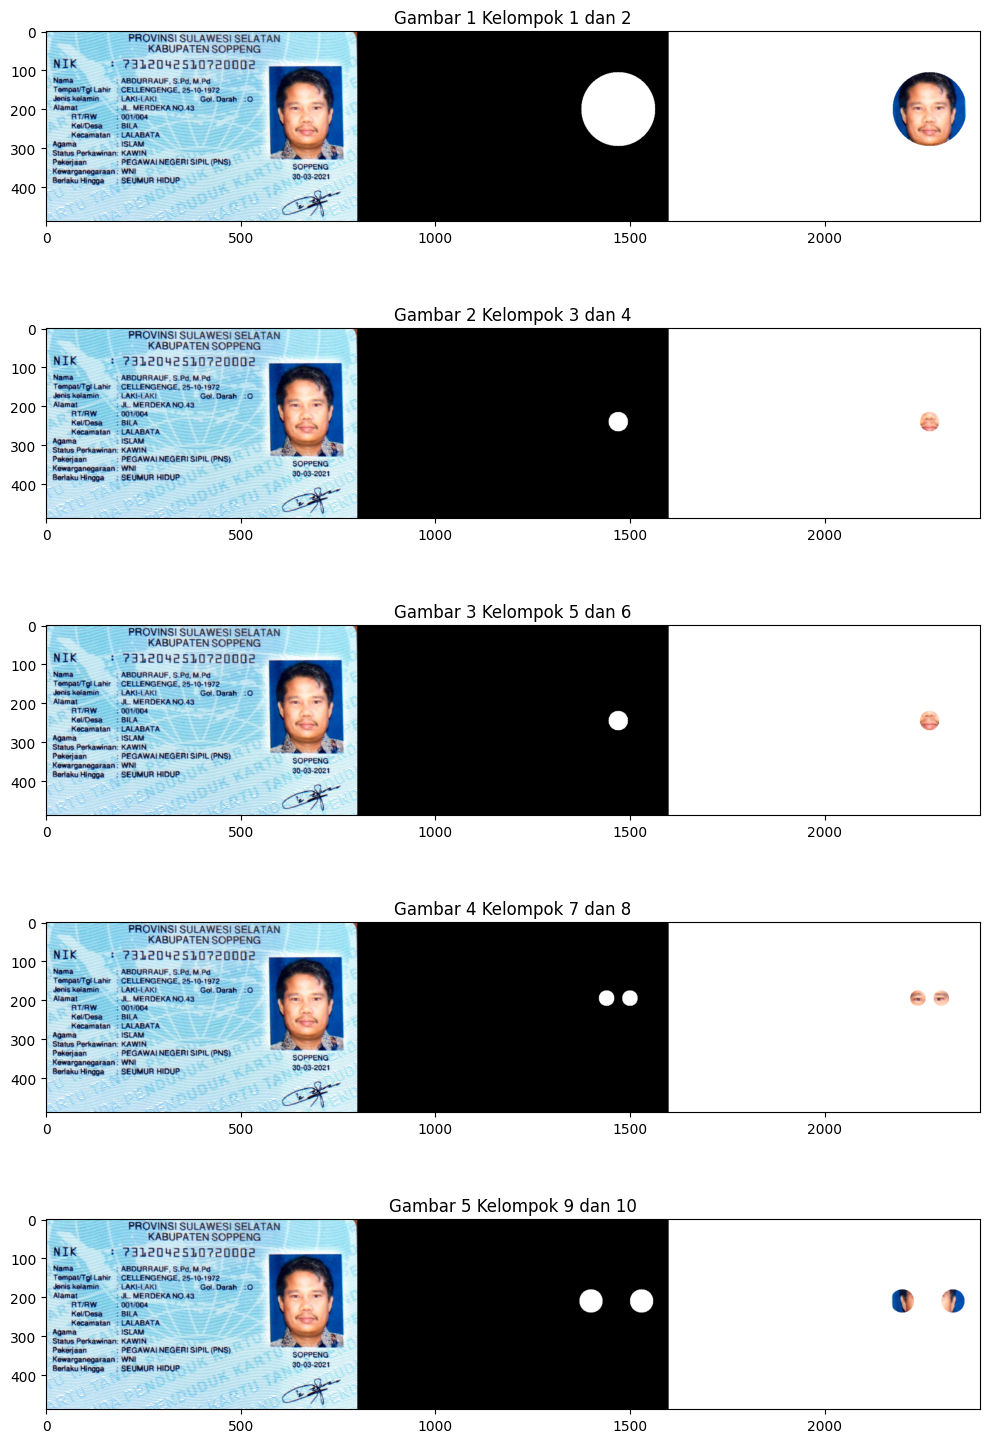

In [9]:
import cv2
import numpy as np
from PIL import Image  # Menambahkan Pillow untuk penanganan masking transparansi
import matplotlib.pyplot as plt

# Membaca gambar asli (gambar KTP yang diunggah)
img_ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp2.jpg')  # Path gambar sesuai file yang diunggah
img_ktp_rgb = cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB)  # Mengubah dari BGR ke RGB untuk PIL

# Konversi gambar asli ke format PIL
image_pil = Image.fromarray(img_ktp_rgb)

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
mask1 = np.zeros(img_ktp.shape[:2], dtype=np.uint8)
mask2 = np.zeros(img_ktp.shape[:2], dtype=np.uint8)
mask3 = np.zeros(img_ktp.shape[:2], dtype=np.uint8)
mask4 = np.zeros(img_ktp.shape[:2], dtype=np.uint8)
mask5 = np.zeros(img_ktp.shape[:2], dtype=np.uint8)

# Membuat beberapa lingkaran sebagai mask pada posisi yang berbeda
mask1 = cv2.circle(mask1, (670, 200), 95, (255), -1)
mask2 = cv2.circle(mask2, (670, 240), 25, (255), -1)
mask3 = cv2.circle(mask3, (670, 245), 25, (255), -1)
mask4 = cv2.circle(mask4, (700, 195), 20, (255), -1)  # lingkar 1 M
mask4 = cv2.circle(mask4, (640, 195), 20, (255), -1)  # lingkar 2 M
mask5 = cv2.circle(mask5, (600, 210), 30, (255), -1)  # lingkar 1 T
mask5 = cv2.circle(mask5, (730, 210), 30, (255), -1)  # lingkar 2 T

# Mengubah mask ke format PIL dan menambahkan transparansi
mask1_pil = Image.fromarray(mask1).convert("L")
mask2_pil = Image.fromarray(mask2).convert("L")
mask3_pil = Image.fromarray(mask3).convert("L")
mask4_pil = Image.fromarray(mask4).convert("L")
mask5_pil = Image.fromarray(mask5).convert("L")

# Ukuran mask
mask_width, mask_height = img_ktp.shape[1], img_ktp.shape[0]

# Background putih
white_bg = Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255))

# Menggabungkan mask dengan background putih
result1 = Image.composite(image_pil, white_bg, mask1_pil)
result2 = Image.composite(image_pil, white_bg, mask2_pil)
result3 = Image.composite(image_pil, white_bg, mask3_pil)
result4 = Image.composite(image_pil, white_bg, mask4_pil)
result5 = Image.composite(image_pil, white_bg, mask5_pil)

# Konversi hasil ke array numpy untuk ditampilkan dengan OpenCV dan Matplotlib
result1_np = np.array(result1)
result2_np = np.array(result2)
result3_np = np.array(result3)
result4_np = np.array(result4)
result5_np = np.array(result5)

# Menggabungkan semua gambar (asli, mask, dan hasil dengan background putih) untuk tiap hasil
final_frame_masking1 = cv2.hconcat([img_ktp_rgb, cv2.cvtColor(mask1, cv2.COLOR_GRAY2RGB), result1_np[:,:,:3]])
final_frame_masking2 = cv2.hconcat([img_ktp_rgb, cv2.cvtColor(mask2, cv2.COLOR_GRAY2RGB), result2_np[:,:,:3]])
final_frame_masking3 = cv2.hconcat([img_ktp_rgb, cv2.cvtColor(mask3, cv2.COLOR_GRAY2RGB), result3_np[:,:,:3]])
final_frame_masking4 = cv2.hconcat([img_ktp_rgb, cv2.cvtColor(mask4, cv2.COLOR_GRAY2RGB), result4_np[:,:,:3]])
final_frame_masking5 = cv2.hconcat([img_ktp_rgb, cv2.cvtColor(mask5, cv2.COLOR_GRAY2RGB), result5_np[:,:,:3]])

# Menampilkan hasil dengan title secara vertikal
plt.figure(figsize=(10, 15))

# Gambar 1
plt.subplot(5, 1, 1)
plt.imshow(final_frame_masking1)
plt.title("Gambar 1 Kelompok 1 dan 2")

# Gambar 2
plt.subplot(5, 1, 2)
plt.imshow(final_frame_masking2)
plt.title("Gambar 2 Kelompok 3 dan 4")

# Gambar 3
plt.subplot(5, 1, 3)
plt.imshow(final_frame_masking3)
plt.title("Gambar 3 Kelompok 5 dan 6")

# Gambar 4
plt.subplot(5, 1, 4)
plt.imshow(final_frame_masking4)
plt.title("Gambar 4 Kelompok 7 dan 8")

# Gambar 5
plt.subplot(5, 1, 5)
plt.imshow(final_frame_masking5)
plt.title("Gambar 5 Kelompok 9 dan 10")

plt.tight_layout()
plt.show()

**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.**
> Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

> Saya menggunakan image couple.tiff

(256, 256, 3)


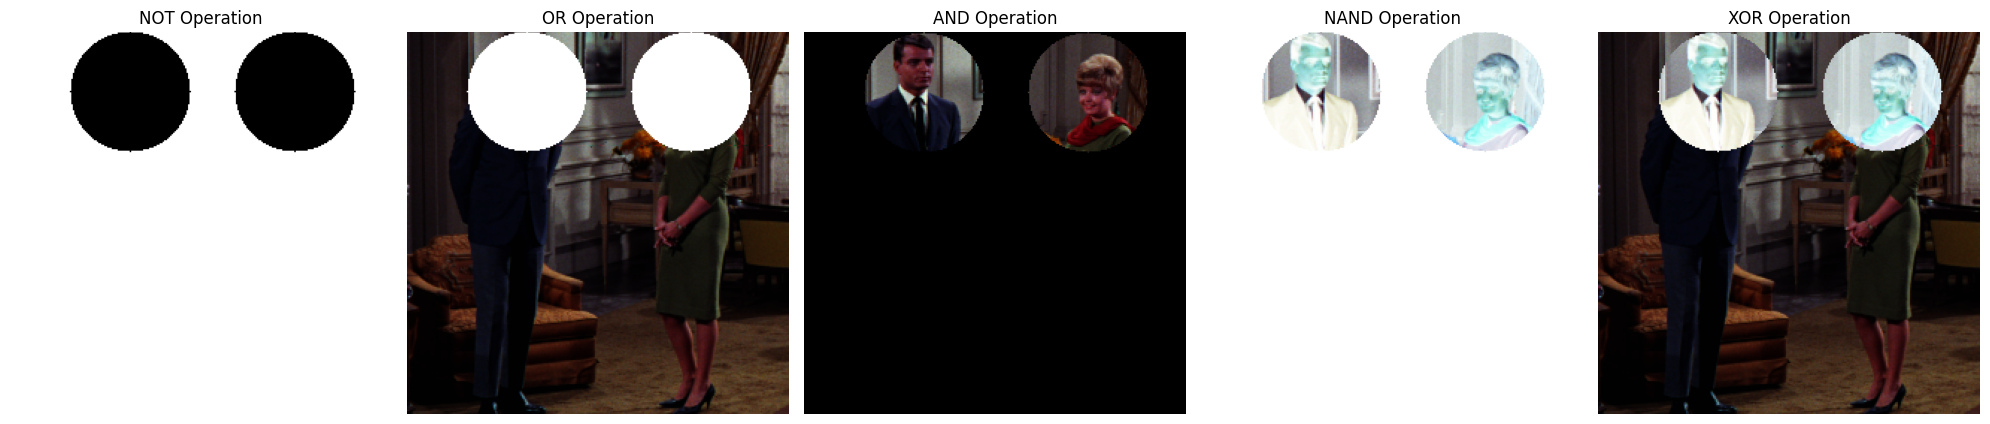

In [10]:
# Membaca gambar asli
img_masking = cv2.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
print(img_masking.shape)

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
mask1 = np.zeros(img_masking.shape, dtype=np.uint8)

# Membuat lingkaran pertama dan kedua dengan warna putih
mask = cv2.circle(mask1, (80, 40), 40, (255, 255, 255), -1)  # Lingkaran pertama
mask = cv2.circle(mask1, (190, 40), 40, (255, 255, 255), -1)  # Lingkaran kedua

# Menggunakan beberapa operasi bitwise
result_not = cv2.bitwise_not(mask)               # Operasi NOT
result_or = cv2.bitwise_or(img_masking, mask)    # Operasi OR
result_and = cv2.bitwise_and(img_masking, mask)  # Operasi AND

# Membuat operasi NAND secara manual (invert hasil AND)
result_nand = cv2.bitwise_not(result_and)

# Menggunakan operasi XOR
result_xor = cv2.bitwise_xor(img_masking, mask)  # Operasi XOR

# Menampilkan hasil dengan urutan yang diinginkan
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# Menampilkan hasil operasi NOT
axs[0].imshow(cv2.cvtColor(result_not, cv2.COLOR_BGR2RGB))
axs[0].set_title('NOT Operation')
axs[0].axis('off')

# Menampilkan hasil operasi OR
axs[1].imshow(cv2.cvtColor(result_or, cv2.COLOR_BGR2RGB))
axs[1].set_title('OR Operation')
axs[1].axis('off')

# Menampilkan hasil operasi AND
axs[2].imshow(cv2.cvtColor(result_and, cv2.COLOR_BGR2RGB))
axs[2].set_title('AND Operation')
axs[2].axis('off')

# Menampilkan hasil operasi NAND
axs[3].imshow(cv2.cvtColor(result_nand, cv2.COLOR_BGR2RGB))
axs[3].set_title('NAND Operation')
axs[3].axis('off')

# Menampilkan hasil operasi XOR
axs[4].imshow(cv2.cvtColor(result_xor, cv2.COLOR_BGR2RGB))
axs[4].set_title('XOR Operation')
axs[4].axis('off')

# Tampilkan keseluruhan plot dengan judul
plt.tight_layout()
plt.show()

Tuliskan hasil analisa anda:
> 1. **NOT Operation**: Menghasilkan inversi dari mask, di mana area dalam lingkaran menjadi hitam dan area di luar menjadi putih.

> 2. **OR Operation**: Menggabungkan gambar asli dan mask, menampilkan semua bagian dari kedua input dengan lingkaran putih.

> 3. **AND Operation**: Menampilkan hanya bagian gambar asli yang berada di dalam area mask, sementara area di luar menjadi hitam.

> 4. **NAND Operation**: Kebalikan dari AND, di mana area di dalam lingkaran menjadi hitam dan area di luar menampilkan gambar asli.

> 5. **XOR Operation**: Menampilkan bagian gambar asli yang tidak beririsan dengan mask, di mana area dalam lingkaran menjadi hitam.